In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import pandas as pd

In [3]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
from mmctools.dataloaders import read_dir, read_date_dirs
import mmctools.measurements.metmast as met

In [5]:
from mmctools.helper_functions import T_to_Tv, covariance
from abl.meteorology import fit_power_law_alpha

# WFIP2/MMC Case  (2016-11-21) : simulation setup
- "CBS-": cross-barrier synoptic
- mountain waves
- topographic wakes
- power ramp event "VOL"

Notes:
- All data except for the PS12 met mast is processed on the fly
- All statistics have timestamps aligned with the *beginning* of the interval

In [6]:
starttime = pd.to_datetime('2016-11-21 17:00')
endtime = pd.to_datetime('2016-11-22 04:00')  # radar data collection slightly offset from the hour

simstart = pd.to_datetime('2016-11-21 22:00')
simend = pd.to_datetime('2016-11-21 23:00')

In [7]:
datadir = '/Users/equon/WFIP2'

In [8]:
zhub = 80.

## read data

### - 80-m met mast

These files are a bit tricky because we want to parse the date from the filename but take the time info from the file. Resampling is performed by simply taking every 20th row (for data at 20 Hz). This may not be exact because the number of rows (i.e., datapoints) varies for some reason. A slower (but more reliable) alternative is to do `df.reset_index(1).resample('1s').first()` so that the first occurrence of each HH:MM:SS entry is taken.
For two days of data, the walltime is...
- 4 s per dataset, quick-and-dirty approach 
- 10 s per dataset, reading 20Hz data and resampling

In [9]:
%%time
dapname = 'met.z28.b0'
dpath = os.path.join(datadir,'PS12',dapname)
PS12_sonic80s = read_date_dirs(dpath, ext='.txt', dir_filter='2016112[12]',
                               reader=met.read_data, column_spec=met.Metek_USA1,
                               height=80,
                               datetime_start=lambda fname: fname,
                               datetime_start_format=dapname+'.%Y%m%d.%H%M%S.sonic80ms.txt',
                               data_freq='50ms', # recorded data at 20Hz
                               #max_data_rows=72000, # deal with inconsistent output data length
                               #output_freq=20, # read every 20 (quick & dirty resample to 1Hz)
                               start=starttime,end=endtime,
                               delim_whitespace=True, # kwarg to pd.read_csv()
                               )
PS12_sonic80s = PS12_sonic80s.reset_index(1).resample('1s').first().set_index('height',append=True)
PS12_sonic80s.drop(columns='time',inplace=True)

Processing /Users/equon/WFIP2/PS12/met.z28.b0/20161121
  24 dataframes added
Processing /Users/equon/WFIP2/PS12/met.z28.b0/20161122
  24 dataframes added
CPU times: user 18.7 s, sys: 3.11 s, total: 21.8 s
Wall time: 10.5 s


In [10]:
%%time
dapname = 'met.z29.b0'
dpath = os.path.join(datadir,'PS12',dapname)
PS12_sonic80w = read_date_dirs(dpath, ext='.txt', dir_filter='2016112[12]',
                               reader=met.read_data, column_spec=met.Metek_USA1,
                               height=80,
                               datetime_start=lambda fname: fname,
                               datetime_start_format=dapname+'.%Y%m%d.%H%M%S.sonic80mw.txt',
                               data_freq='50ms', # recorded data at 20Hz
                               #max_data_rows=72000, # deal with inconsistent output data length
                               #output_freq=20, # read every 20 (quick & dirty resample to 1Hz)
                               start=starttime,end=endtime,
                               delim_whitespace=True, # kwarg to pd.read_csv()
                               )
PS12_sonic80w = PS12_sonic80w.reset_index(1).resample('1s').first().set_index('height',append=True)
PS12_sonic80w.drop(columns='time',inplace=True)

Processing /Users/equon/WFIP2/PS12/met.z29.b0/20161121
  24 dataframes added
Processing /Users/equon/WFIP2/PS12/met.z29.b0/20161122
  24 dataframes added
CPU times: user 18.8 s, sys: 2.85 s, total: 21.7 s
Wall time: 11.3 s


In [11]:
%%time
dapname = 'met.z30.b0'
dpath = os.path.join(datadir,'PS12',dapname)
PS12_sonic50s = read_date_dirs(dpath, ext='.txt', dir_filter='2016112[12]',
                               reader=met.read_data, column_spec=met.Metek_USA1,
                               height=50,
                               datetime_start=lambda fname: fname,
                               datetime_start_format=dapname+'.%Y%m%d.%H%M%S.sonic50ms.txt',
                               data_freq='50ms', # recorded data at 20Hz
                               #max_data_rows=72000, # deal with inconsistent output data length
                               #output_freq=20, # read every 20 (quick & dirty resample to 1Hz)
                               start=starttime,end=endtime,
                               delim_whitespace=True, # kwarg to pd.read_csv()
                               )
PS12_sonic50s = PS12_sonic50s.reset_index(1).resample('1s').first().set_index('height',append=True)
PS12_sonic50s.drop(columns='time',inplace=True)

Processing /Users/equon/WFIP2/PS12/met.z30.b0/20161121
  24 dataframes added
Processing /Users/equon/WFIP2/PS12/met.z30.b0/20161122
  24 dataframes added
CPU times: user 18.9 s, sys: 2.89 s, total: 21.8 s
Wall time: 11.7 s


In [12]:
%%time
dapname = 'met.z31.b0'
dpath = os.path.join(datadir,'PS12',dapname)
PS12_sonic50w = read_date_dirs(dpath, ext='.txt', dir_filter='2016112[12]',
                               reader=met.read_data, column_spec=met.Metek_USA1,
                               height=50,
                               datetime_start=lambda fname: fname,
                               datetime_start_format=dapname+'.%Y%m%d.%H%M%S.sonic50mw.txt',
                               data_freq='50ms', # recorded data at 20Hz
                               #max_data_rows=72000, # deal with inconsistent output data length
                               #output_freq=20, # read every 20 (quick & dirty resample to 1Hz)
                               start=starttime,end=endtime,
                               delim_whitespace=True, # kwarg to pd.read_csv()
                               )
PS12_sonic50w = PS12_sonic50w.reset_index(1).resample('1s').first().set_index('height',append=True)
PS12_sonic50w.drop(columns='time',inplace=True)

Processing /Users/equon/WFIP2/PS12/met.z31.b0/20161121
  24 dataframes added
Processing /Users/equon/WFIP2/PS12/met.z31.b0/20161122
  24 dataframes added
CPU times: user 18.9 s, sys: 3.03 s, total: 21.9 s
Wall time: 11.7 s


In [13]:
t = PS12_sonic80s.index.levels[0]
assert(np.all(t==PS12_sonic80w.index.levels[0]))
assert(np.all(t==PS12_sonic50s.index.levels[0]))
assert(np.all(t==PS12_sonic50w.index.levels[0]))

In [14]:
t

DatetimeIndex(['2016-11-21 17:00:00', '2016-11-21 17:00:01',
               '2016-11-21 17:00:02', '2016-11-21 17:00:03',
               '2016-11-21 17:00:04', '2016-11-21 17:00:05',
               '2016-11-21 17:00:06', '2016-11-21 17:00:07',
               '2016-11-21 17:00:08', '2016-11-21 17:00:09',
               ...
               '2016-11-22 03:59:51', '2016-11-22 03:59:52',
               '2016-11-22 03:59:53', '2016-11-22 03:59:54',
               '2016-11-22 03:59:55', '2016-11-22 03:59:56',
               '2016-11-22 03:59:57', '2016-11-22 03:59:58',
               '2016-11-22 03:59:59', '2016-11-22 04:00:00'],
              dtype='datetime64[ns]', name='datetime', length=39601, freq='S')

In [15]:
ps12_s = pd.concat((PS12_sonic50s,PS12_sonic80s)).sort_index()
ps12_s.head()

w      Ts      wspd        wdir
datetime            height                                    
2016-11-21 17:00:00 50     -0.01  279.36  2.832402  253.804527
                    80      0.29  280.45  4.421595  247.669203
2016-11-21 17:00:01 50      0.03  279.32  2.847631  253.474204
                    80      0.43  280.41  4.478895  246.583045
2016-11-21 17:00:02 50     -0.02  279.30  2.748545  250.444333

In [16]:
ps12_w = pd.concat((PS12_sonic50w,PS12_sonic80w)).sort_index()
ps12_w.head()

w      Ts      wspd        wdir
datetime            height                                    
2016-11-21 17:00:00 50     -0.03  279.47  2.873082  247.272754
                    80     -0.17  278.76  4.651075  243.710407
2016-11-21 17:00:01 50     -0.04  279.50  2.790287  246.558746
                    80     -0.08  278.77  4.782353  241.934561
2016-11-21 17:00:02 50     -0.08  279.51  2.755721  248.275808

### - UND met towers
Notes:
- These data are averaged at interval of 15 minutes at the *start* of the bin
- "Run A": air and sonic temperature are equal
- "Run B" ("biomet" data): accounts for T/RH measurements at the same height to correct fluxes

In [17]:
def eddypro_height_wrapper(dpath,prefix,heights):
    """call reader for EddyPro output: read RM Young sonic data, postprocessed using
    EddyPro, for different heights
    """
    dflist = []
    for h in heights:
        df = read_dir(dpath=dpath, prefix=prefix, ext='.son{:02d}m.biomet.full_output.csv'.format(int(h)),
                      reader=met.read_data, column_spec=met.EddyPro_biomet_fulloutput,
                      skiprows=3, # throw out header lines
                      start=starttime,end=endtime,
                      height=h)        
        dflist.append(df)
    return pd.concat(dflist).sort_index()

In [267]:
# ps01 = eddypro_height_wrapper(os.path.join(datadir,'PS01','met.z18.b0'),
#                               prefix='met.z18.b0.2016112',
#                               heights=[3.0,10.0] # "Run A"
#                              )
ps01 = eddypro_height_wrapper(os.path.join(datadir,'PS01','met.z18.b0'),
                              prefix='met.z18.b0.2016112',
                              heights=[3.0,10.0] # "Run B"
                             )

In [268]:
# ps02 = eddypro_height_wrapper(os.path.join(datadir,'PS02','met.z19.b0'),
#                               prefix='met.z19.b0.2016112',
#                               heights=[3.0,10.0,17.0], # "Run A" only
#                              )
ps02 = eddypro_height_wrapper(os.path.join(datadir,'PS02','met.z19.b0'),
                              prefix='met.z19.b0.2016112',
                              heights=[3.0,17.0], # "Run B"
                             )

In [269]:
# ps06 = eddypro_height_wrapper(os.path.join(datadir,'PS06','met.z21.b0'),
#                               prefix='met.z21.b0.2016112',
#                               heights=[3.0,10.0,21.0], # "Run A" only
#                              )
ps06 = eddypro_height_wrapper(os.path.join(datadir,'PS06','met.z21.b0'),
                              prefix='met.z21.b0.2016112',
                              heights=[3.0], #[3.0,21.0], # "Run B"
                             )

In [270]:
# ps11 = eddypro_height_wrapper(os.path.join(datadir,'PS11','met.z23.b0'),
#                               prefix='met.z23.b0.2016112',
#                               heights=[3.0,10.0], # "Run A"
#                              )
ps11 = eddypro_height_wrapper(os.path.join(datadir,'PS11','met.z23.b0'),
                              prefix='met.z23.b0.2016112',
                              heights=[3.0,10.0], # "Run B"
                             )

In [271]:
met.standard_output(ps01).head()

wspd        wdir          H          Ts  \
datetime            height                                                
2016-11-21 17:00:00 3.0     1.084219  256.912813  18.174976  279.383216   
                    10.0    1.202281  258.084327  25.247004  279.468315   
2016-11-21 17:15:00 3.0     1.766393  234.884595  32.891201  279.881558   
                    10.0    1.904892  236.706704  60.996553  279.916663   
2016-11-21 17:30:00 3.0     0.924838  234.508938  53.063224  280.119514   

                                     T           P         e         es  \
datetime            height                                                
2016-11-21 17:00:00 3.0     279.800707  961.482517  8.275326   9.752926   
                    10.0    279.858380  961.482517  8.322235   9.791698   
2016-11-21 17:15:00 3.0     280.324353  961.482517  8.468184  10.109974   
                    10.0    280.320120  961.482517  8.502706  10.107042   
2016-11-21 17:30:00 3.0     280.678427  961.482517  8.386156  10.357887   

                                   q         RH          Td     ustar  \
datetime            height                                              
2016-11-21 17:00:00 3.0     0.005371  84.849673  277.400254  0.103480   
                    10.0    0.005401  84.992773  277.480876  0.157531   
2016-11-21 17:15:00 3.0     0.005496  83.760687  277.729169  0.144504   
                    10.0    0.005519  84.126553  277.787346  0.188840   
2016-11-21 17:30:00 3.0     0.005443  80.963967  277.590090  0.184510   

                                 TKE       z_L    Tw_cov  
datetime            height                                
2016-11-21 17:00:00 3.0     0.157229 -0.567431  0.015082  
                    10.0    0.146604 -0.756628  0.020954  
2016-11-21 17:15:00 3.0     0.162088 -0.377078  0.027343  
                    10.0    0.168109 -1.061156  0.050706  
2016-11-21 17:30:00 3.0     0.193142 -0.292232  0.044168

sanity checks

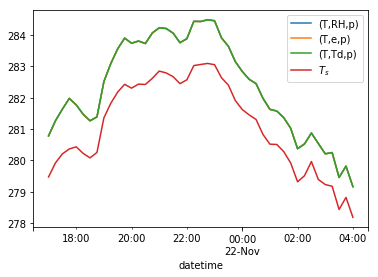

In [274]:
Tv = dict()
mm = ps01.copy()
Tv['(T,RH,p)'] = T_to_Tv(mm['T'], RH=mm['RH'], p=mm['P'])
Tv['(T,e,p)'] = T_to_Tv(mm['T'], e=mm['e'], p=mm['P'])
Tv['(T,Td,p)'] = T_to_Tv(mm['T'], Td=mm['Td'], p=mm['P'])
for method,temp in Tv.items():
    temp.xs(10,level=1).plot(label=method)
mm['Ts'].xs(10,level=1).plot(label=r'$T_s$')
plt.legend()

In [256]:
np.max(np.abs(Tv['(T,RH,p)'] - Tv['(T,e,p)']))

KeyError: '(T,RH,p)'

In [257]:
np.max(np.abs(Tv['(T,RH,p)'] - Tv['(T,Td,p)']))

KeyError: '(T,RH,p)'

In [258]:
np.max(np.abs(Tv['(T,e,p)'] - Tv['(T,Td,p)']))

KeyError: '(T,e,p)'

### - PNNL met stations (PS04,05,10)
instantaneous 20Hz data

In [23]:
%%time
dpath = os.path.join(datadir,'PS04')
ps04 = read_date_dirs(dpath,dir_filter='2016112[12]',
                  reader=met.read_data, column_spec=met.Gill_R3_50,
                  datetime_start=lambda fname: fname.lstrip('met.z09.b0.').rstrip('.csv'),
                  datetime_start_format='%Y%m%d.%H%M%S',
                  data_freq='50ms', # recorded data at 20Hz
                  #max_data_rows=6000, # inconsistent output data length
                  #output_freq=20, # read every 20 (quick & dirty resample to 1Hz)
                  start=starttime,end=endtime)
ps04 = ps04.resample('1s').first()

Processing /Users/equon/WFIP2/PS04/20161121
  288 dataframes added
Processing /Users/equon/WFIP2/PS04/20161122
  288 dataframes added
CPU times: user 8.89 s, sys: 701 ms, total: 9.59 s
Wall time: 10 s


In [24]:
%%time
dpath = os.path.join(datadir,'PS05')
ps05 = read_date_dirs(dpath,dir_filter='2016112[12]',
                  reader=met.read_data, column_spec=met.Gill_R3_50,
                  datetime_start=lambda fname: fname.lstrip('met.z11.b0.').rstrip('.csv'),
                  datetime_start_format='%Y%m%d.%H%M%S',
                  data_freq='50ms', # recorded data at 20Hz
                  #max_data_rows=6000, # inconsistent output data length
                  #output_freq=20, # read every 20 (quick & dirty resample to 1Hz)
                  start=starttime,end=endtime)
ps05 = ps05.resample('1s').first()

Processing /Users/equon/WFIP2/PS05/20161121
  119 dataframes added
Processing /Users/equon/WFIP2/PS05/20161122
  288 dataframes added
CPU times: user 6.98 s, sys: 735 ms, total: 7.72 s
Wall time: 7.37 s


In [25]:
%%time
dpath = os.path.join(datadir,'PS10')
ps10 = read_date_dirs(dpath,dir_filter='2016112[12]',
                  reader=met.read_data, column_spec=met.Gill_R3_50,
                  datetime_start=lambda fname: fname.lstrip('met.z10.b0.').rstrip('.csv'),
                  datetime_start_format='%Y%m%d.%H%M%S',
                  data_freq='50ms', # recorded data at 20Hz
                  #max_data_rows=6000, # inconsistent output data length
                  #output_freq=20, # read every 20 (quick & dirty resample to 1Hz)
                  start=starttime,end=endtime)
ps10 = ps10.resample('1s').first()

Processing /Users/equon/WFIP2/PS10/20161121
  288 dataframes added
Processing /Users/equon/WFIP2/PS10/20161122
  288 dataframes added
CPU times: user 8.71 s, sys: 760 ms, total: 9.46 s
Wall time: 9.78 s


### - PNNL met stations (PS07,08)
Note: These data were averaged at interval of 1 min at the *end* of the bin

In [26]:
#ps07 = read_process_trim(os.path.join(datadir,'PS07','201611'),file_filter='*.2016112[12].*')
dpath = os.path.join(datadir,'PS07','201611')
ps07 = read_dir(dpath,ext='txt',file_filter='*.2016112[12].*',
                  reader=met.read_data, column_spec=met.RMYoung_05106,
                  height=3.,
                  datetime_offset=-60, # shift 60s to line up with begining of interval
                  start=starttime,end=endtime)
ps07['Tv'] = T_to_Tv(ps07['T'],RH=ps07['RH'],p=ps07['P'])

In [27]:
#ps08 = read_process_trim(os.path.join(datadir,'PS08','201611'),file_filter='*.2016112[12].*')
dpath = os.path.join(datadir,'PS08','201611')
ps08 = read_dir(dpath,ext='txt',file_filter='*.2016112[12].*',
                  reader=met.read_data, column_spec=met.RMYoung_05106,
                  height=3.,
                  datetime_offset=-60, # shift 60s to line up with begining of interval
                  start=starttime,end=endtime)
ps08['Tv'] = T_to_Tv(ps08['T'],RH=ps08['RH'],p=ps08['P'])

In [28]:
met.standard_output(ps07).head()

,,wspd,wdir,HorizontalWind,wdir_std,T,RH,P,SW_down,T10X,p10X,Tv
datetime,height,,,,,,,,,,,
2016-11-21 17:00:00,3.0,0.858,271.5,0.871,9.780,279.481,84.2,959.58,255.8,6.605,14.17,280.372414
2016-11-21 17:01:00,3.0,1.074,264.6,1.076,3.722,279.509,83.2,959.51,263.0,6.665,13.58,280.391747
2016-11-21 17:02:00,3.0,1.192,260.4,1.204,7.930,279.552,83.0,959.51,264.6,6.732,13.37,280.435402
2016-11-21 17:03:00,3.0,1.081,274.8,1.093,8.350,279.622,83.3,959.56,257.6,6.839,13.73,280.513067
2016-11-21 17:04:00,3.0,1.545,260.3,1.552,5.421,279.703,83.5,959.51,268.8,6.907,13.69,280.601529


In [29]:
met.standard_output(ps08).head()

,,wspd,wdir,HorizontalWind,wdir_std,T,RH,P,SW_down,T10X,p10X,Tv
datetime,height,,,,,,,,,,,
2016-11-21 17:00:00,3.0,1.066,231.2,1.068,3.725,279.830,82.9,961.56,0,6.332,14.33,280.728463
2016-11-21 17:01:00,3.0,0.898,230.6,0.903,6.016,279.852,83.3,961.55,0,6.391,14.32,280.756231
2016-11-21 17:02:00,3.0,0.837,239.1,0.840,4.310,279.898,83.4,961.55,0,6.464,14.33,280.806344
2016-11-21 17:03:00,3.0,0.932,239.6,0.933,2.458,279.916,83.1,961.55,0,6.581,14.33,280.822280
2016-11-21 17:04:00,3.0,0.808,239.4,0.815,7.490,279.942,82.6,961.54,0,6.646,14.32,280.844570


### - PS12 lidar

In [30]:
%%time 
fpath = os.path.join(datadir,'Siemens','Siemens_Nov2016_10min.csv')
lidar = pd.read_csv(fpath,parse_dates=['datetime'])
inrange = (lidar['datetime'] >= starttime) & (lidar['datetime'] <= endtime)
lidar = lidar.loc[inrange].set_index(['datetime','height']).sort_index()

CPU times: user 62.1 ms, sys: 13.8 ms, total: 75.9 ms
Wall time: 81.6 ms


make sure we have a DatetimeIndex with regularly spaced intervals

In [158]:
dtindex = pd.DatetimeIndex(start=starttime,end=endtime,freq='10min')

In [159]:
lidar = lidar.reset_index(1).pivot(columns='height').reindex(index=dtindex,method='nearest').stack()

## Quantities of interest
<font color='blue'>**TODO**: PLOT THESE VS WRF (Hawbecker ERA-I run) </font>

In [32]:
def setup_datetime_axis(axlist):
    if not hasattr(axlist,'__iter__'):
        axlist = [axlist]
    for ax in axlist:
        ax.axvspan(simstart,simend,color='0.5',alpha=0.3)
        ax.tick_params(axis='both',which='major',labelsize='large')
    # just set the last axes, assuming sharex=True
    ax.set_xlim((starttime,endtime))
    ax.set_xlabel('{:s} to {:s} [UTC]'.format(starttime.strftime('%Y-%m-%d'),endtime.strftime('%Y-%m-%d')),
                  fontsize='x-large')
    ax.set_xticks(pd.date_range(start=starttime,end=endtime,freq='1h'))
    ax.set_xticks([],minor=True)
    ax.set_xticklabels(pd.date_range(start=starttime,end=endtime,freq='1h').strftime('%H:%M'))

### mean wind (PS12)
Note: lidar wind direction estimates are unreliable in terrain

In [122]:
mean_s = ps12_s.unstack(level=1).resample('10min').mean().stack()

In [123]:
mean_w = ps12_w.unstack(level=1).resample('10min').mean().stack()

In [177]:
wspd = (mean_s.xs(80,level=1)['wspd'] + mean_w.xs(80,level=1)['wspd'] + lidar.xs(80,level=1)['wspd']) / 3
wspd0 = wspd.loc[simstart]

In [181]:
wdir = (mean_s.xs(80,level=1)['wdir'] + mean_w.xs(80,level=1)['wdir']) / 2
wdir0 = wdir.loc[simstart]

In [182]:
print(wspd0,wdir0)

8.731678170951668 262.06997959154455


In [186]:
inrange = (wspd.index >= simstart) & (wspd.index <= simend)
wspd_sim = wspd.loc[inrange]
wdir_sim = wdir.loc[inrange]

In [212]:
wspd_init = pd.Series([wspd0,wspd0],index=[starttime,simstart])
wdir_init = pd.Series([wdir0,wdir0],index=[starttime,simstart])

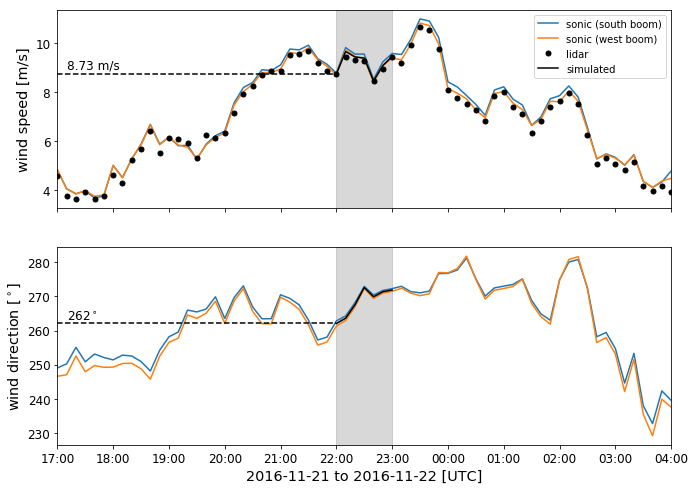

In [228]:
zplot = zhub
fig,ax = plt.subplots(nrows=2,sharex=True,figsize=(11,8))

lidarstyle = dict(ls='none',color='k',marker='o',markersize=5)
mean_s['wspd'].xs(zplot,level=1).plot(ax=ax[0],label='sonic (south boom)')
mean_w['wspd'].xs(zplot,level=1).plot(ax=ax[0],label='sonic (west boom)')
lidar['wspd'].xs(zplot,level=1).plot(ax=ax[0],**lidarstyle,label='lidar')
wspd_init.plot(ax=ax[0],color='k',ls='--',label='')
wspd_sim.plot(ax=ax[0],color='k',label='simulated')
ax[0].text(starttime+pd.to_timedelta('10min'),wspd0+0.2,'{:.2f} m/s'.format(wspd0),fontsize='large')

mean_s['wdir'].xs(zplot,level=1).plot(ax=ax[1],label='sonic (south boom)')
mean_w['wdir'].xs(zplot,level=1).plot(ax=ax[1],label='sonic (west boom)')
#lidar['wdir'].xs(zplot,level=1).plot(ax=ax[1],**lidarstyle,label='lidar')
wdir_init.plot(ax=ax[1],color='k',ls='--',label='')
wdir_sim.plot(ax=ax[1],color='k',label='simulated')
ax[1].text(starttime+pd.to_timedelta('10min'),wdir0+1,r'{:.0f}$^\circ$'.format(wdir0),fontsize='large')

ax[0].set_ylabel('wind speed [m/s]',fontsize='x-large')
ax[1].set_ylabel(r'wind direction [$^\circ$]',fontsize='x-large')
ax[0].legend()
setup_datetime_axis(ax)
# ax[0].text(0.01,0.97,'z={:g} m'.format(zplot),
#            fontsize='x-large',
#            horizontalalignment='left',
#            verticalalignment='top',
#            transform=ax[0].transAxes)

### Mean wind (other PS)

In [234]:
wdir_other = dict()
# UND
wdir_other[428+3] = ps01['wspd'].xs(3,level=1)
wdir_other[428+10] = ps01['wspd'].xs(10,level=1)
wdir_other[445+3] = ps02['wspd'].xs(3,level=1)
wdir_other[445+17] = ps02['wspd'].xs(17,level=1)
wdir_other[484+3] = ps11['wspd'].xs(3,level=1)
wdir_other[484+10] = ps11['wspd'].xs(10,level=1)
# PNNL (10-m towers)
wdir_other[426+10] = ps04['wspd'].resample('15min').mean()
wdir_other[449+10] = ps05['wspd'].resample('15min').mean()
wdir_other[459+10] = ps10['wspd'].resample('15min').mean()
# PNNL (surface met)
wdir_other[467+3] = ps07['wspd'].xs(3,level=1).resample('15min').mean()
wdir_other[451+3] = ps08['wspd'].xs(3,level=1).resample('15min').mean()

In [245]:
elev_range = list(wdir_other.keys())
np.min(elev_range), np.max(elev_range)

(431, 494)

### Heat Flux

- <font color='red'>Note 1: eddy covariance method not necessarily valid with horizontal heterogeneity</font>
- Note 2: PS05 has bad sonic data (occasional spikes)

In [38]:
hflux = dict()

# eddypro output
hflux['PS01'] = ps01.xs(3,level=1)['Tw_cov']
hflux['PS02'] = ps02.xs(3,level=1)['Tw_cov']
hflux['PS06'] = ps06.xs(3,level=1)['Tw_cov']
hflux['PS11'] = ps11.xs(3,level=1)['Tw_cov']

# eddy covariance method applied to 1Hz data
hflux['PS04 (ECM)'] = covariance(ps04['Ts'],ps04['w'],'15min')
#hflux['PS05 (ECM)'] = covariance(ps05['Ts'],ps05['w'],'15min')
hflux['PS10 (ECM)'] = covariance(ps10['Ts'],ps10['w'],'15min')

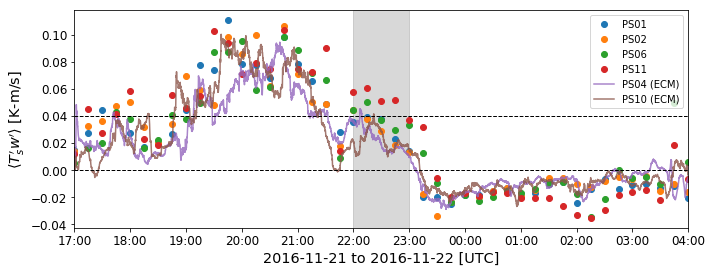

In [39]:
fig,ax = plt.subplots(figsize=(11,4))
for key,qwall in hflux.items():
    if key.endswith('(ECM)'):
        style = dict(ls='-',alpha=0.8)
    else:
        style = dict(ls='none',marker='o')
    qwall.plot(**style,ax=ax,label=key)
ax.axhline(0.04,ls='--',color='k',lw=1)
ax.axhline(0,ls='--',color='k',lw=1)
ax.legend()
ax.set_ylabel(r"$\langle T_s' w' \rangle$ [K-m/s]",fontsize='x-large')
setup_datetime_axis(ax)

## stability

KeyError: '(z-d)/L'

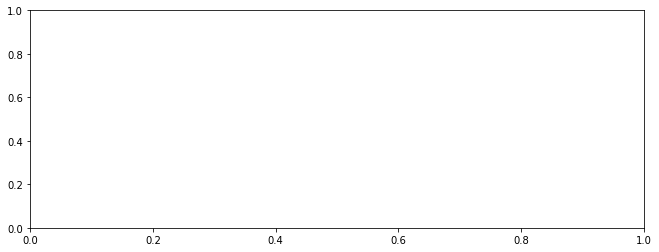

In [40]:
fig,ax = plt.subplots(figsize=(11,4))
zref = 10.
plotcol = '(z-d)/L'
sty = dict(
    ls='none',
    marker='o',
    markersize=5,
)

ps01.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS01 ({:.0f} m)'.format(zref))
ps02.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS02 ({:.0f} m)'.format(zref))
ps06.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS06 ({:.0f} m)'.format(zref))
ps11.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS11 ({:.0f} m)'.format(zref))
ax.set_ylim((-2,2))

setup_datetime_axis(ax)
ax.tick_params(labelsize='x-large')
ax.set_ylabel('z/L at {:.0f}m [-]'.format(zref),fontsize='x-large')
ax.set_title('Atmospheric Stability')
ax.axhline(0,color='k',lw=1)
# ax.axhline(-0.02,color='k',ls='--')
# ax.axhline(0.02,color='k',ls='--')
ax.axvspan(simstart,simend,color='0.9')
ax.legend()

In [ ]:
fig,ax = plt.subplots(figsize=(11,4))
sty = dict(
    #lw = 3,
    ls='none',
    marker='o',
    markersize=5,
)

zref = 3.
plotcol = 'w/ts_cov'
ps01.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS01 ({:.0f} m)'.format(zref))
ps02.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS02 ({:.0f} m)'.format(zref))
ps06.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS06 ({:.0f} m)'.format(zref))
ps11.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS11 ({:.0f} m)'.format(zref))
ax.set_ylim((-0.05,0.125))

# zref = 10.
# plotcol = 'hflux'
# ps04[plotcol].plot(ax=ax,**sty,label='PS04 ({:.0f} m)'.format(zref))
# ps05[plotcol].plot(ax=ax,**sty,label='PS05 ({:.0f} m)'.format(zref))
# ps10[plotcol].plot(ax=ax,**sty,label='PS10 ({:.0f} m)'.format(zref))

ax2 = ax.twinx()
ps07['SW_down'].plot(ax=ax2,color='0.5',alpha=0.5)
ps07['SW_down'].resample('15min',label='left').median().plot(ax=ax2,color='k')
ax2.set_ylim((-260,650))
ax2.set_ylabel(r'downwelling SW solar radiation [W/m$^2$]')

setup_datetime_axis(ax)
ax.tick_params(labelsize='x-large')
ax.set_ylabel(r"$\overline{T_s'w'}$ [K-m/s]",fontsize='x-large')
ax.set_title('Heat Flux')
ax.axhline(0,color='k',ls='--')
ax.axvspan(simstart,simend,color='0.9')
ax.legend(title=r"$\overline{T_s'w'}$")

In [ ]:
fig,ax = plt.subplots(figsize=(11,4))
sty = dict(
    #lw = 3,
    ls='none',
    marker='o',
    markersize=5,
)

# zref = 3.
# plotcol = 'w/ts_cov'
# ps01.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS01 ({:.0f} m)'.format(zref))
# ps02.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS02 ({:.0f} m)'.format(zref))
# ps06.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS06 ({:.0f} m)'.format(zref))
# ps11.xs(zref,level=1)[plotcol].plot(ax=ax,**sty,label='PS11 ({:.0f} m)'.format(zref))
# ax.set_ylim((-0.05,0.125))

zref = 10.
plotcol = 'hflux'
ps04[plotcol].plot(ax=ax,**sty,label='PS04 ({:.0f} m)'.format(zref))
ps05[plotcol].plot(ax=ax,**sty,label='PS05 ({:.0f} m)'.format(zref))
ps10[plotcol].plot(ax=ax,**sty,label='PS10 ({:.0f} m)'.format(zref))

ax2 = ax.twinx()
ps07['SW_down'].plot(ax=ax2,color='0.5',alpha=0.5)
ps07['SW_down'].resample('15min',label='left').median().plot(ax=ax2,color='k')
ax2.set_ylim((-260,650))
ax2.set_ylabel(r'downwelling SW solar radiation [W/m$^2$]')

setup_datetime_axis(ax)
ax.tick_params(labelsize='x-large')
ax.set_ylabel(r"$\overline{T_s'w'}$ [K-m/s]",fontsize='x-large')
ax.set_title('Heat Flux')
ax.axhline(0,color='k',ls='--')
ax.axvspan(simstart,simend,color='0.9')
ax.legend(title=r"$\overline{T_s'w'}$")

In [ ]:
fig,ax = plt.subplots(figsize=(11,4))

zref = 3.
plotcol='Tv'
Tv_mean = (ps01_biomet.xs(zref,level=1)[plotcol] 
           + ps02_biomet.xs(zref,level=1)[plotcol] 
           + ps06_biomet.xs(zref,level=1)[plotcol]) / 3 - 273.15
(ps01_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,color=colors[0],label='PS01 ({:.0f} m)'.format(zref))
(ps02_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,color=colors[1],label='PS02 ({:.0f} m)'.format(zref))
(ps06_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,color=colors[2],label='PS06 ({:.0f} m)'.format(zref))
#(ps11_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,color=colors[3],label='PS11 ({:.0f} m)'.format(zref))
Tv_mean.plot(ax=ax,color='k',label='mean of PS01/2/6 ({:.0f} m)'.format(zref))

plotcol='T'
(ps01_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,ls=':',color=colors[0],label='')
(ps02_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,ls=':',color=colors[1],label='')
(ps06_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,ls=':',color=colors[2],label='')
#(ps11_biomet.xs(zref,level=1)[plotcol]-273.15).plot(ax=ax,ls=':',color=colors[3],label='')
ax.set_ylim((3,12))
ax.set_yticks(range(3,13))

zref = 2.
(ps07['Tv']-273.15).plot(ax=ax,color=colors[4],label='PS07 ({:.0f} m)'.format(zref))
(ps07['T']-273.15).plot(ax=ax,ls=':',color=colors[4],label='')
(ps08['Tv']-273.15).plot(ax=ax,color=colors[5],label='PS08 ({:.0f} m)'.format(zref))
(ps08['T']-273.15).plot(ax=ax,ls=':',color=colors[5],label='')

sim_mean_range = (Tv_mean.index >= '2016-11-21 21:00') & (Tv_mean.index <= '2016-11-21 23:00')
Tv_sim = Tv_mean.loc[sim_mean_range].mean()
print(Tv_sim,Tv_sim+273.15)
ax.axhline(Tv_sim,color='k',ls='--')

setup_datetime_axis(ax)
ax.tick_params(labelsize='x-large')
ax.set_ylabel(r"$T$ (dotted), $T_v$ (solid) [$^\circ$C]",fontsize='x-large')
ax.axvspan(simstart,simend,color='0.9')
ax.legend(ncol=2)
ax.set_title('Surface Air Temperature')